In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/data.csv', sep=',', index_col='id')
df.reset_index(drop=True, inplace=True)

df.head()

,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,conscientiousness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
df2 = df.copy()

use_mapping = {'CL0': 0, #never used
               'CL1': 0, #over a decade ago
               'CL2': 0, #within the last decade
               'CL3': 1, #within the last year
               'CL4': 1, #within the last month
               'CL5': 1, #within the last week
               'CL6': 1} #within the last day

ed_mapping = {'Left school before 16 years': 1,
                'Left school at 16 years':2,
                'Left school at 17 years':3,
                'Left school at 18 years':4,
                'Some college or university, no certificate or degree':5,
                'Professional certificate/ diploma':6,
                'University degree':7,
                'Masters degree':8,
                'Doctorate degree':9,}

age_mapping = {'18-24':0,
               '25-34':1,
               '35-44':2,
               '45-54':3,
               '55-64':4,
               '65+':5}

gender_mapping = {'Female':0, 'Male':1}

country_mapping = {'UK':0, 
                   'Canada':2, 
                   'USA':1, 
                   'Other':2, 
                   'Australia':2, 
                   'Republic of Ireland':2,
                   'New Zealand':2}

ethnicity_mapping = {'Mixed-White/Asian':1,
                     'White':0,
                     'Other':1,
                     'Mixed-White/Black':1,
                     'Asian':1, 
                     'Black':2, 
                     'Mixed-Black/Asian':1}

df2.age = df2.age.map(age_mapping)
df2.gender = df2.gender.map(gender_mapping)
df2.education = df2.education.map(ed_mapping)
df2.country = df2.country.map(country_mapping)
df2.ethnicity = df2.ethnicity.map(ethnicity_mapping)

for j in ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']:
    temp = []
    for i in df[j]:
        temp.append(use_mapping[i])

    df2[j] = temp

leg = ['Alcohol', 'Caff', 'Choc', 'Legalh',  'Nicotine']
ileg = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',  'LSD', 'Meth', 'Mushrooms', 'VSA']
fic = ['Semer']

df2['any_illeg'] = 0
df2.loc[df2[ileg].sum(axis=1) > 0,'any_illeg'] = 1

leg = ['Alcohol', 'Caff', 'Choc', 'Legalh',  'Nicotine']
ileg = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',  'LSD', 'Meth', 'Mushrooms', 'VSA']
fic = ['Semer']

pers = ['neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsive', 'sensation']
other = ['age', 'gender', 'country', 'ethnicity', 'education']

df2.head()

,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,conscientiousness,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,any_illeg
0,2,0,6,0,1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
1,1,1,9,0,0,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,0,0,0,1,0,1,0,0,1
2,2,1,6,0,0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,1
3,0,0,8,0,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,1
4,2,0,9,0,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,1


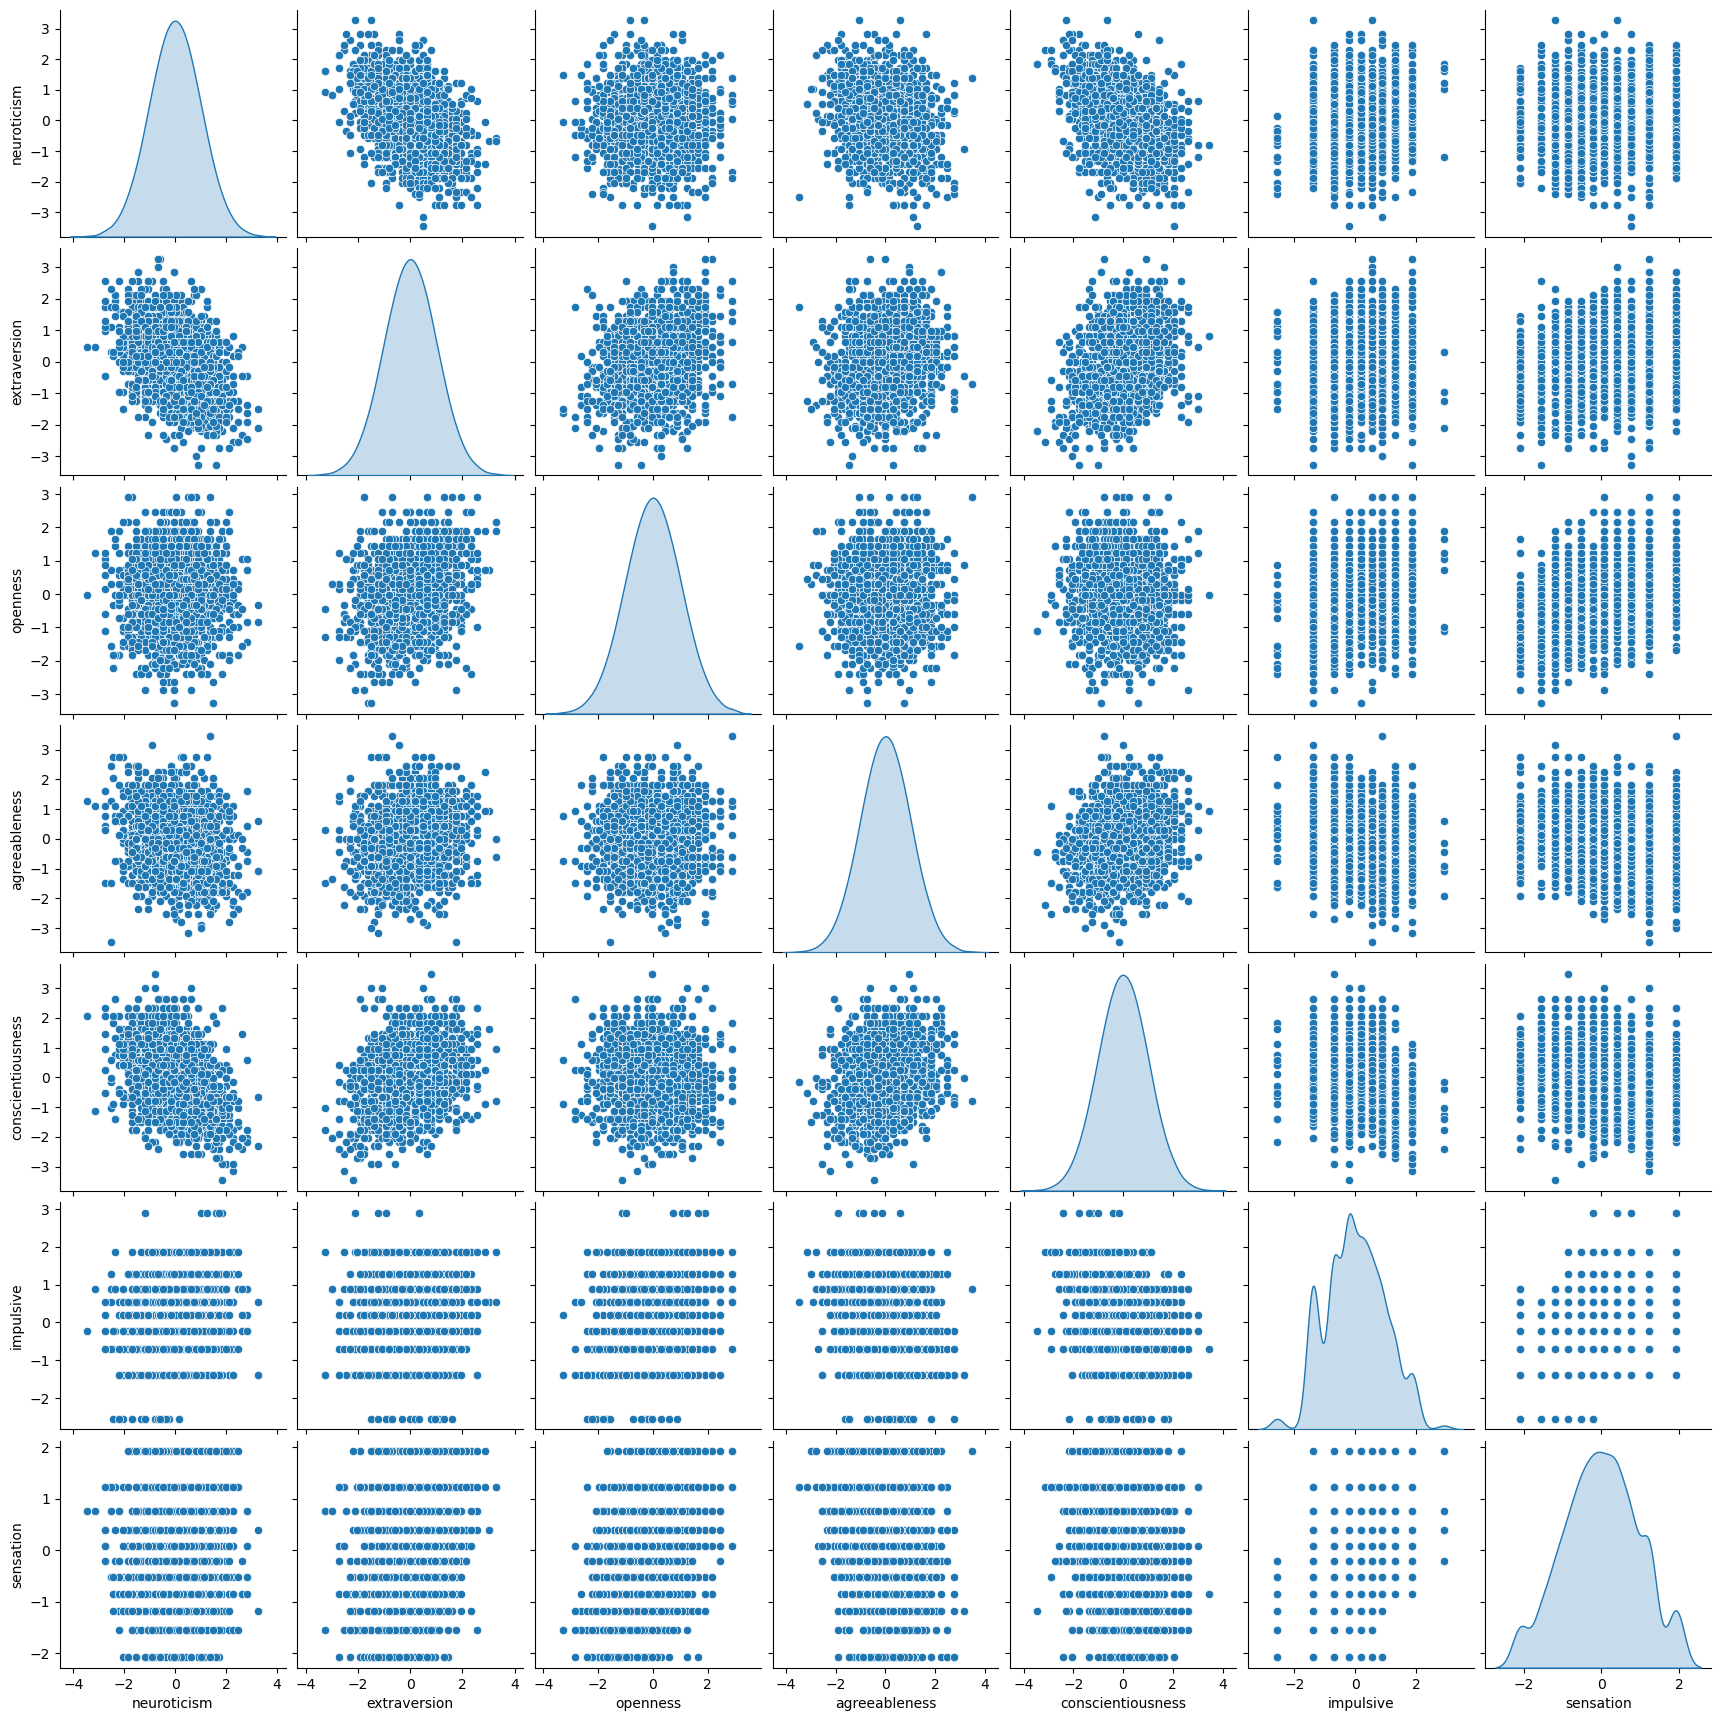

In [7]:
sns.pairplot(data=df2, vars=pers, diag_kind='kde');

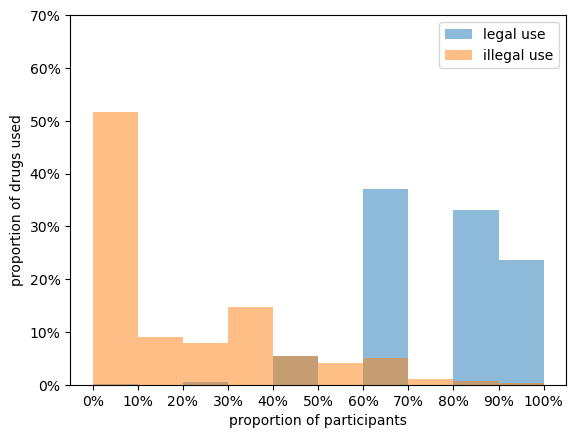

In [8]:

n = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,]
plt.hist(df2[leg].sum(axis=1)/len(leg), label='legal use', alpha=0.5, bins=n, density=True)
plt.hist(df2[ileg].sum(axis=1)/len(ileg), label='illegal use', alpha=0.5, bins=n, density=True, )
#plt.hist(df2[ileg+leg].sum(axis=1)/len(ileg+leg), label='total use', alpha=0.2, bins=n, density=True);
#plt.hist(df2[fic].sum(axis=1)/len(fic));
plt.ylabel('proportion of drugs used')
plt.xlabel('proportion of participants')
plt.yticks([0,1,2,3,4,5,6,7], labels=['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%'])
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], labels=['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.legend();

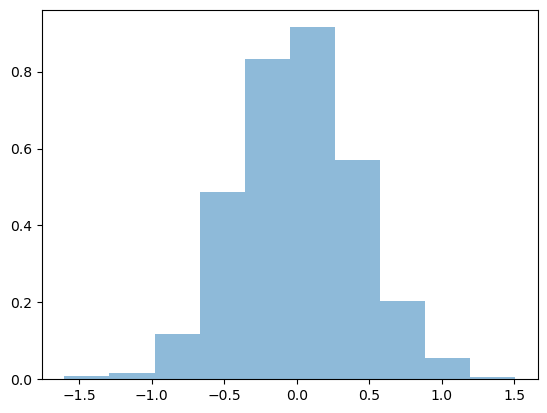

In [9]:
plt.hist(df2[pers].sum(axis=1)/len(pers), alpha=0.5, density=True);

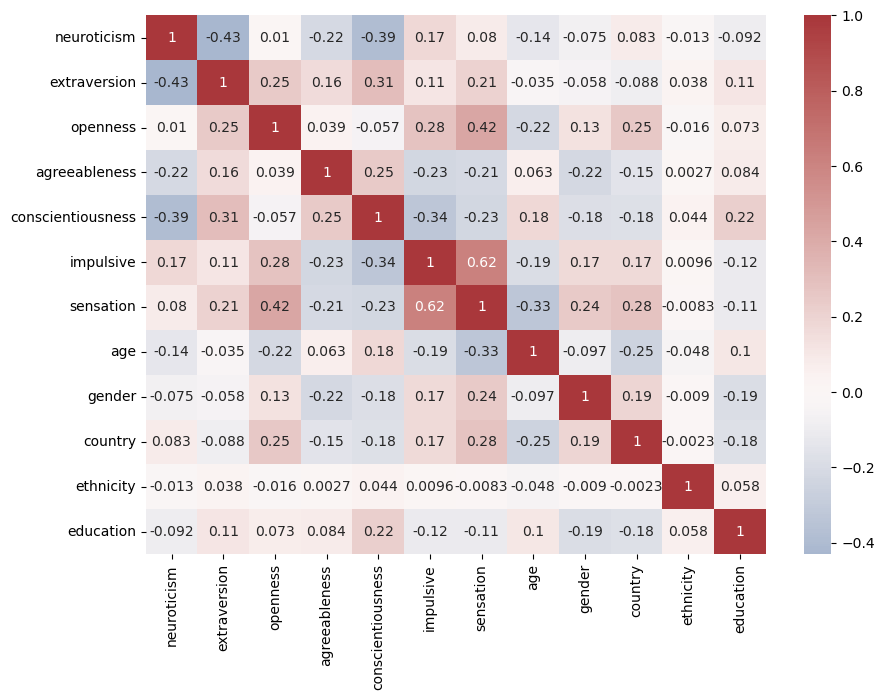

In [10]:
colormap = sns.color_palette("vlag", as_cmap=True)
_, ax = plt.subplots(1,1, figsize=(10,7))
sns.heatmap(df2[pers+other].corr(), xticklabels=pers+other, yticklabels=pers+other, cmap=colormap, center=0.00, annot=True, ax=ax);

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

clf = sm.Logit(df2['any_illeg'], df2[pers]).fit(disp=0 # doesn't really matter what we use as y here as we are only interested in the predictors
                                             )
variables = clf.model.exog

vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
[f'{x[0]}: {x[1]:.3}' for x in zip(pers,vif)]

['neuroticism: 1.4',
 'extraversion: 1.49',
 'openness: 1.28',
 'agreeableness: 1.15',
 'conscientiousness: 1.4',
 'impulsive: 1.79',
 'sensation: 1.91']

In [12]:
df2.groupby('Semer').count() #3 people claim to have used a non-existance drug recently

,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,conscientiousness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,any_illeg
Semer,,,,,,,,,,,,,,,,,,,,,
0,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,...,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [13]:
df2[df2.Semer==1][ileg]

,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
817,0,0,0,1,0,0,1,0,0,1,0,1,0
1516,0,1,0,1,1,0,0,0,0,0,0,1,0
1533,1,0,1,1,1,0,1,0,1,0,0,1,1


In [14]:
sdf = df2[df2.Semer==1]
sdf[['age','gender','education'] + pers]

,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation
817,0,1,5,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173
1516,0,1,5,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987
1533,0,0,5,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575


In [15]:
sdf[leg+ileg]

,Alcohol,Caff,Choc,Legalh,Nicotine,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
817,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
1516,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0
1533,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1


In [16]:
users = pd.DataFrame(columns=['user', 'non-user','users%'])

for i in leg+ileg:
    temp = [i,df2[i].sum(axis=0)/df2.shape[0]]
    #print(f'{i} users: {df2[i].sum(axis=0)/df2.shape[0]:.1%}')
    users.loc[i] =  df2[i].sum(axis=0), df2.shape[0] - df2[i].sum(axis=0),round(100*df2[i].sum(axis=0)/df2.shape[0], 2)



users.sort_values(by='users%', ascending=False)

,user,non-user,users%
Choc,1840.0,45.0,97.61
Caff,1824.0,61.0,96.76
Alcohol,1749.0,136.0,92.79
Nicotine,1060.0,825.0,56.23
Cannabis,999.0,886.0,53.00
Legalh,564.0,1321.0,29.92
Benzos,535.0,1350.0,28.38
Ecstasy,517.0,1368.0,27.43
Amphet,436.0,1449.0,23.13
Mushrooms,434.0,1451.0,23.02


In [17]:
(10*7)/(0.024)

2916.6666666666665

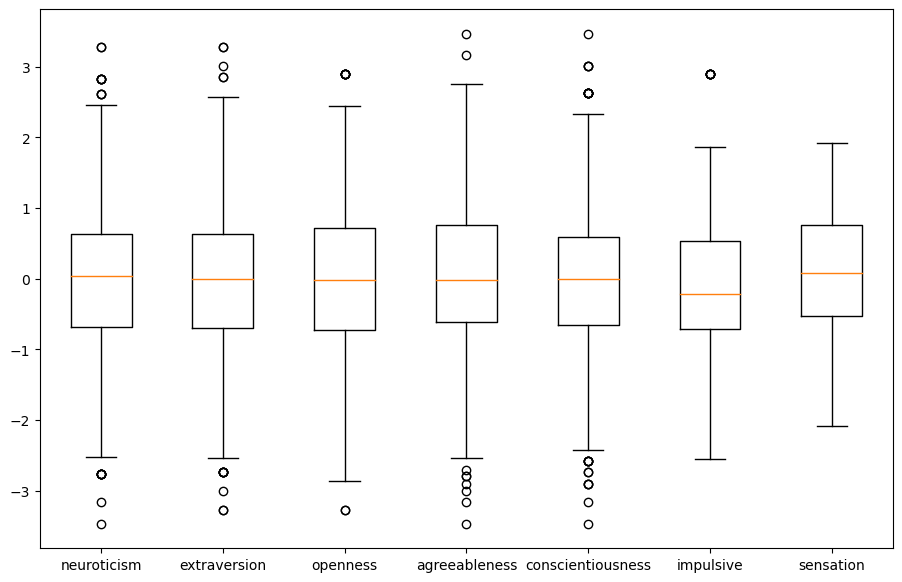

In [18]:
_,ax = plt.subplots(1,1, figsize=(11,7))
ax.boxplot(df[pers], labels=pers);

In [19]:
ed_mapping = {k: v for k, v in sorted(ed_mapping.items(), key=lambda item: item[1])}
ed = list(ed_mapping.keys())

age_mapping = {k: v for k, v in sorted(age_mapping.items(), key=lambda item: item[1])}
age = list(age_mapping.keys())

country = ['UK', 'US', 'Other']

gender = ['Female', 'Male']

ethnicity = ['White', 'Other', 'Black']

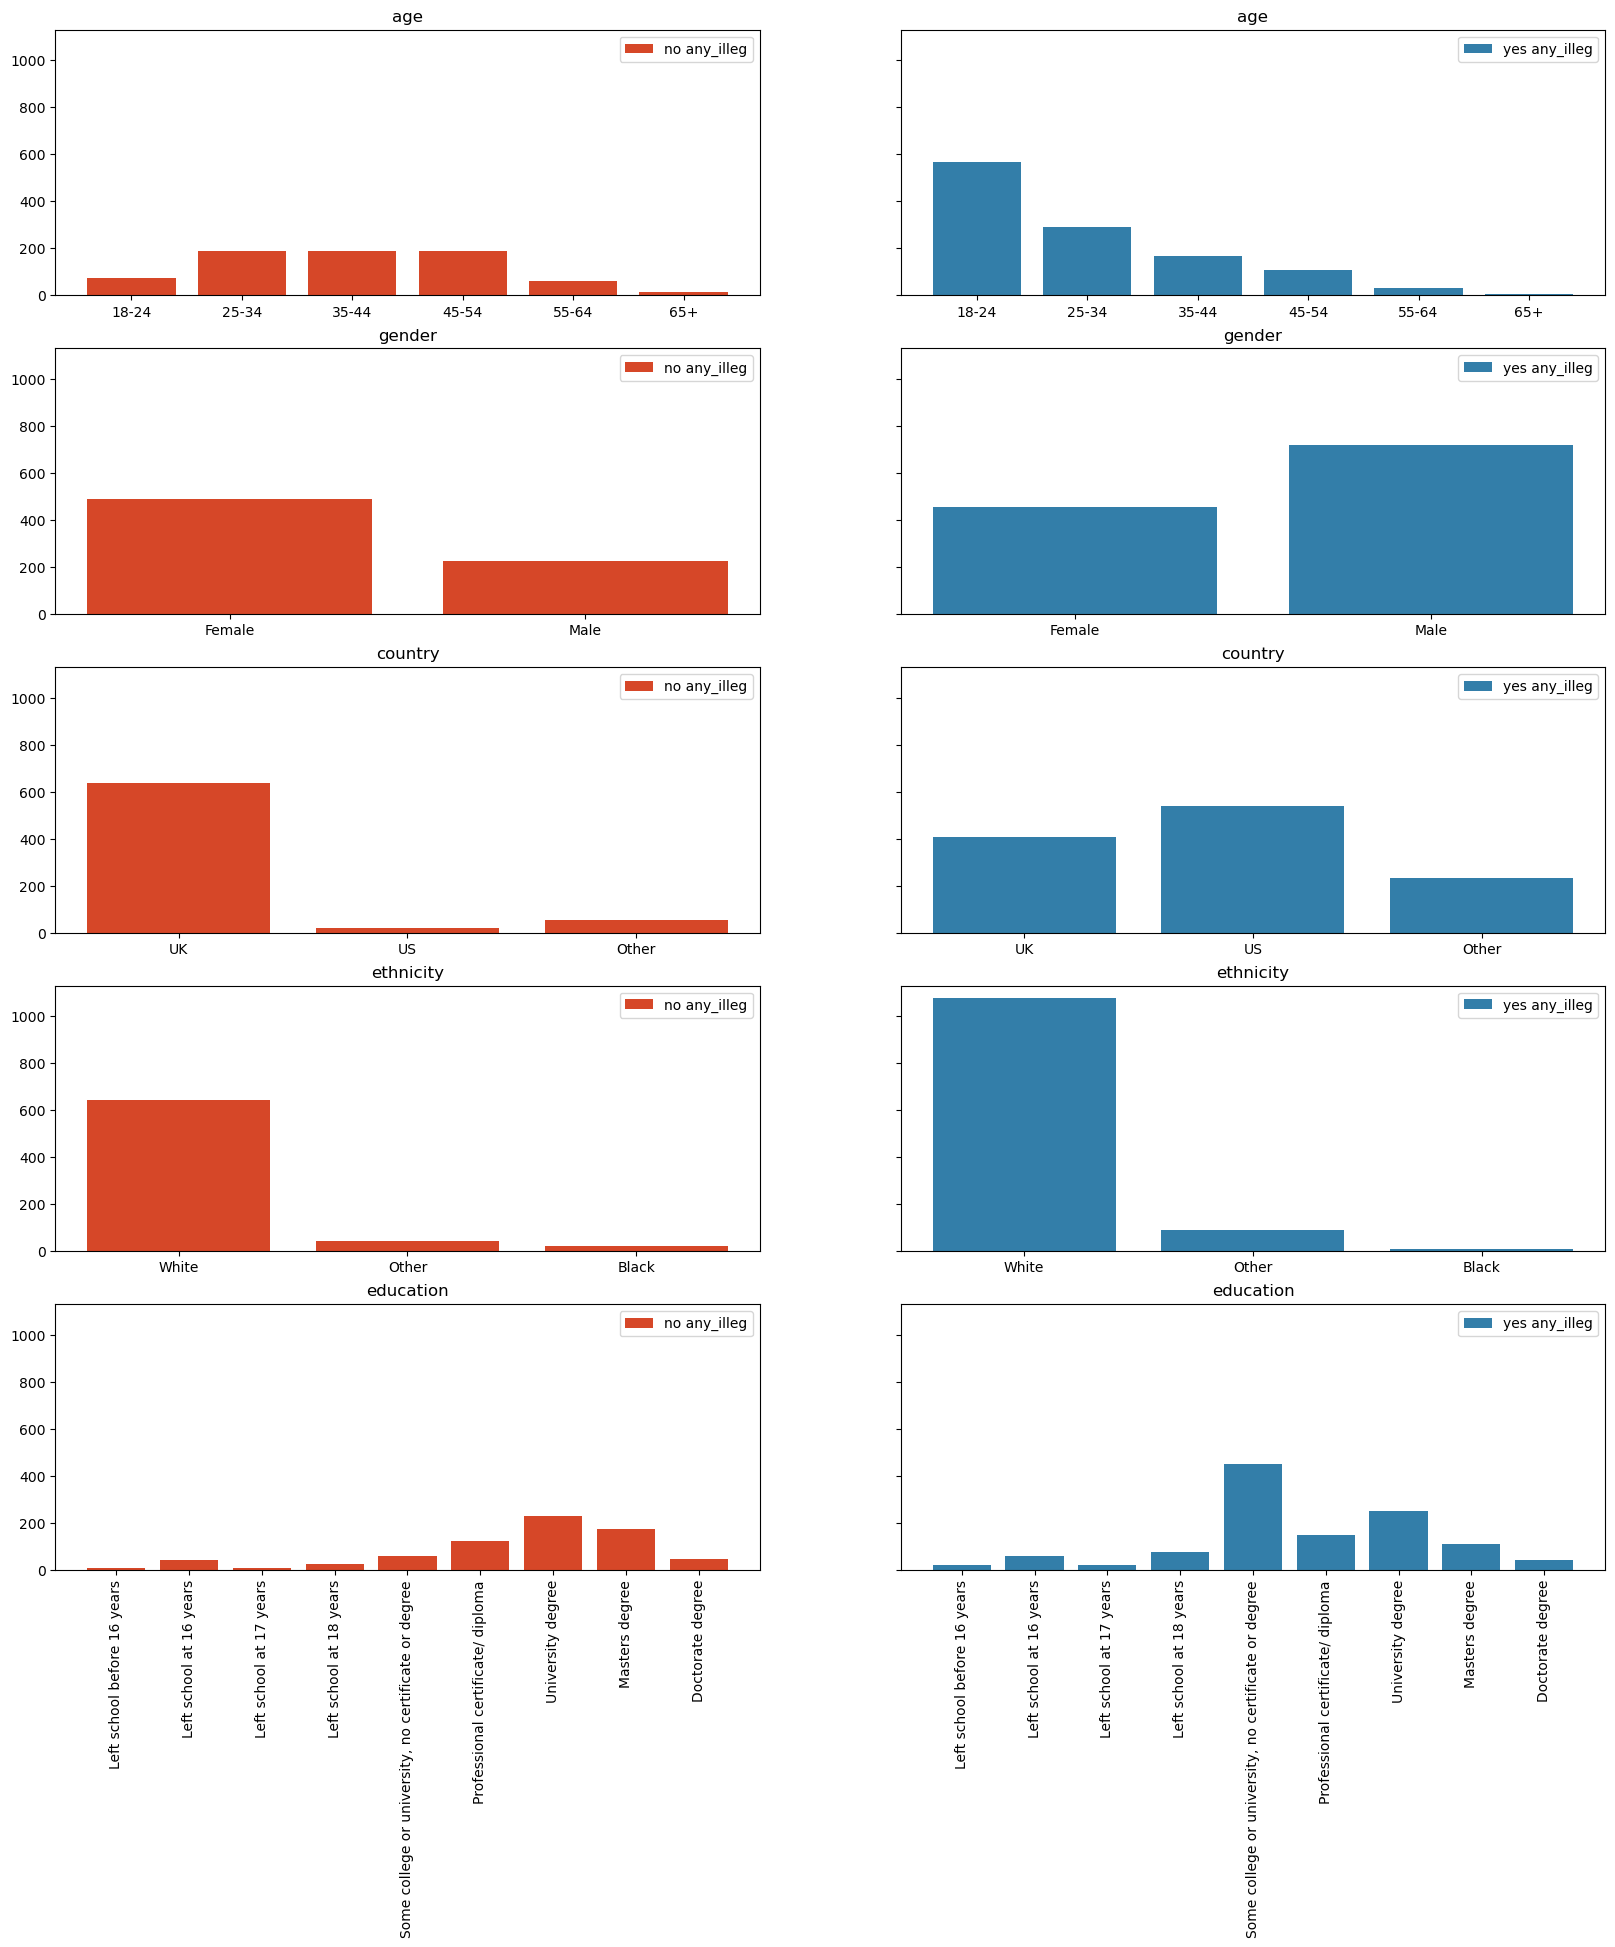

In [20]:
drug = 'any_illeg'
n = len(other)
_, axes = plt.subplots(n,2, figsize=(20,20), sharey=True)

for i in range(n):
    cat = other[i]
    a = df2[df2[drug]==0]
    b = df2[df2[drug]==1]

    temp = a.groupby(cat).count()
    axes[i,0].bar(temp.index, temp.any_illeg, facecolor='#D64728',label=f'no {drug}')
    axes[i,0].set_title(f'{cat}')
    axes[i,0].legend()

    temp2 = b.groupby(cat).count()
    axes[i,1].bar(temp2.index, temp2.any_illeg, facecolor='#337EA9',label=f'yes {drug}')
    axes[i,1].set_title(f'{cat}')
    axes[i,1].legend();


axes[0,0].set_xticks([0,1,2,3,4,5], labels=age)
axes[0,1].set_xticks([0,1,2,3,4,5], labels=age)

axes[1,0].set_xticks([0,1], labels=gender)
axes[1,1].set_xticks([0,1], labels=gender)

axes[2,0].set_xticks([0,1,2], labels=country)
axes[2,1].set_xticks([0,1,2], labels=country)

axes[3,0].set_xticks([0,1,2], labels=ethnicity)
axes[3,1].set_xticks([0,1,2], labels=ethnicity)

axes[4,0].set_xticks([1,2,3,4,5,6,7,8,9], rotation=90, labels=ed)
axes[4,1].set_xticks([1,2,3,4,5,6,7,8,9], rotation=90, labels=ed);